## 第1章 NumPy基础

- NumPy擅长做什么？  
Python 本身含有列表（list）和数组（array），但对于大数据来说，这些结构是有很多不足的。  
由于列表的元素可以是任何对象，因此列表中所保存的是对象的指针。例如为了保存一个简单的[1,2,3]，都需要有 3 个指针和 3 个整数对象。对于数值运算来说，这种结构显然比较浪费内存和 CPU 等宝贵资源。  
至于array对象，它可以直接保存数值，和C语言的一维数组比较类似。但是由于它不支持多维，在上面的函数也不多，因此也不适合做数值运算。  
NumPy 的诞生弥补了这些不足，它提供了两种基本的对象：ndarray（N-dimensional Array Object）和 ufunc（Universal Function Object）。ndarray 是存储单一数据类型的多维数组，而 ufunc 则是能够对数组进行处理的函数。  
NumPy 通常与 SciPy（Scientific Python）和 Matplotlib（绘图库）一起使用， 这种组合广泛用于替代 MatLab，是一个强大的科学计算环境，有助于我们通过 Python 学习数据科学或者机器学习。
- NumPy相关的库或模块  
1、Pandas 是一个数据处理工具，其结构有点像数据库中的表一样，有字段，有行和列等。  
2、SciPy 是一个开源的 Python 算法库和数学工具包。  
SciPy 包含的模块有最优化、线性代数、积分、插值、特殊函数、快速傅里叶变换、信号处理和图像处理、常微分方程求解和其他科学与工程中常用的计算。  
3、Matplotlib 是 Python 编程语言及其数值数学扩展包 NumPy 的可视化操作界面，它为利用通用的图形用户界面工具包。


### 1.1 把图像数字化

机器学习中图像、自然语言、语音等等在输入模型之前，都需要转换为数组或矩阵。这里我们先用一个把图像转换为NumPy的例子来直观的感受一下NumPy的一些属性及创建。

数据类型:<class 'numpy.ndarray'>,形状：(675, 1200, 3)
img数组的维度: 3
img数组的形状: (675, 1200, 3)
img数组的数据类型: uint8


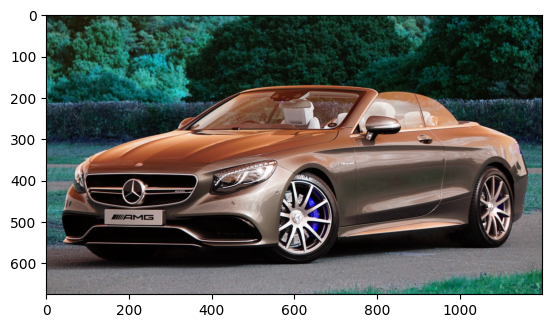

In [1]:
#使用OpenCV开源库读取图片数据
import cv2

from  matplotlib import pyplot as plt
%matplotlib inline


# 读取一张照片,把图片转换为2维的numpy数组
img = cv2.imread('./data/car.jpg')

#使用plt显示图像
plt.imshow(img)

# 显示img的数据类型及大小
print("数据类型:{},形状：{}".format(type(img),img.shape))
print("img数组的维度:",img.ndim)
print("img数组的形状:",img.shape)
print("img数组的数据类型:",img.dtype)

#### 1.1.1 数组属性

作为NumPy的ndarray对象有三个重要的属性：
- ndarray.ndim - 数组的维度（轴）的个数。
- ndarray.shape - 数组的维度，值是一个整数元祖，元祖的值代表其所对应的轴的长度。 比如对于二维数组，它用来表达这是个几行几列的矩阵，值为（x, y），其中x代表这个数组中有几行， y代表有几列。
- ndarray.dtype - data type，描述数组中元素的类型
比如下面这个数组：

In [2]:
print("img数组的维度:",img.ndim)
print("img数组的形状:",img.shape)
print("img数组的数据类型:",img.dtype)

img数组的维度: 3
img数组的形状: (675, 1200, 3)
img数组的数据类型: uint8


#### 为更好理解ndarray对象三个重要的属性，我们把一维数组、二维数组、三维数组进行可视化，如图1-3所示。
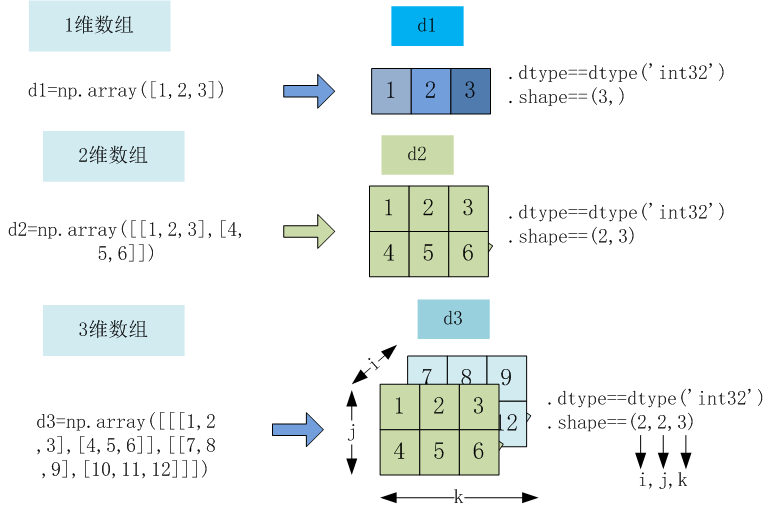
<center>图1-3 多维数组的可视化表示</center>


#### 1.1.2从已有数据中创建数组
直接对 Python 的基础数据类型(如列表、元组等) 进行转换来生成 ndarray。   
1）将列表转换成 ndarray。  

In [1]:
import numpy as np

lst1 = [3.1415926, 2.17, 0, 1, 2]
nd1 =np.array(lst1)
print(nd1)
print(type(nd1))


[3.1415926 2.17      0.        1.        2.       ]
<class 'numpy.ndarray'>


2）嵌套列表可以转换成多维 ndarray。

In [5]:
import numpy as np

lst2 = [[3.14, 2.17, 0, 1, 2], [1, 2, 3, 4, 5],[5,4,3,2,1]]
nd2 =np.array(lst2)
print(nd2)
print(type(nd2))

[[3.14 2.17 0.   1.   2.  ]
 [1.   2.   3.   4.   5.  ]
 [5.   4.   3.   2.   1.  ]]
<class 'numpy.ndarray'>


如果把上面示例中的列表换成元组，上述转换方法也同样适合。

#### 1.1.3利用 random 模块生成数组

在深度学习中，我们经常需要对一些参数进行初始化，为了更有效地训练模型，提高模型的性能，有些初始化还需要满足一定条件，如满足正态分布或均匀分布等。这里我们先来看几个np.random 模块常用的函数，如表1-1所示。


|表1-1 np.random模块常用函数|
|---------------------------|

|函数	|描述|
|:-----------------|:---------------------------|
np.random.random	|生成 0 到 1 之间的随机数|
np.random.uniform	|生成均匀分布随机数|
np.random.randn	   |生成标准正态的随机数|
np.random.randint	|生成随机的整数|
np.random.normal	|生成正态分布|
np.random.shuffle	|随机打乱顺序|
np.random.seed	   |设置随机数种子|
random_sample	   |生成随机的浮点数|

	下面我们来看看一些函数的具体使用：

In [10]:
import numpy as np

print('生成形状(4, 4)，值在0-1之间的随机数:')
print(np.random.random((4, 4)), end='\n\n')

# 产生一个取值范围在[1, 50)之间的数组，数组的shape是(3, 3)
# 参数起始值（low）默认为0， 终止值（high）默认为1。
print('生成形状(3, 3)，值在low-high之间的随机整数::')
print(np.random.randint(low=1, high=50, size=(3,3)), end='\n\n')

print('产生的数组元素是均匀分布的随机数:')
print(np.random.uniform(low=1, high=3, size=(3, 3)), end='\n\n')

print('生成满足正态分布的形状为(3, 3)的矩阵:')
print(np.random.randn(3,3))


生成形状(4, 4)，值在0-1之间的随机数:
[[0.23611631 0.25341755 0.27839925 0.31560382]
 [0.39324915 0.24860046 0.44613742 0.0810187 ]
 [0.67772065 0.36768216 0.18179169 0.30027999]
 [0.48241083 0.30372007 0.86568891 0.92671711]]

生成形状(3, 3)，值在low-high之间的随机整数::
[[49  4 29  6]
 [20 41 32 35]
 [12 40 19 49]
 [49 38 17 34]]

产生的数组元素是均匀分布的随机数:
[[1.2649984  2.35983641 2.90650717]
 [2.43405509 2.70741214 2.04765559]
 [2.70579837 1.27471373 2.67218665]]

生成满足正态分布的形状为(3, 3)的矩阵:
[[ 0.69758061  0.15034344  1.25840246]
 [ 1.11783837  0.572782   -0.18288919]
 [ 0.31899292 -1.37564309 -0.77893987]]


用以上方法生成的随机数是无法重现的，比如调用两次np.random.randn(3, 3), 输出结果是一样的概率极低。如果我们想要多次生成同一份数据，应该怎么办呢？可以使用np.random.seed函数设置种子。设置一个种子，然后调用随机函数产生一个数组，如果想要再次得到一个一模一样的数组，只要再次设置同样的种子就可以。

In [13]:
import numpy as np
np.random.seed(10)

print("按指定随机种子，第1次生成随机数:")
print(np.random.randint(1, 5, (2, 2)))

# 想要生成同样的数组，必须再次设置相同的种子
np.random.seed(10)
print("按相同随机种子，第2次生成的数据:")
print(np.random.randint(1, 5, (2, 2)))


按指定随机种子，第1次生成随机数:
[[2 2]
 [1 4]]
按相同随机种子，第2次生成的数据:
[[2 2]
 [1 4]]


#### 1.1.4利用 arange、linspace 函数生成数组

还有一些情况下，我们希望用到具有特定规律的一组数据，这时可以使用NumPy提供给我们的arange、linspace函数来生成数组。
arange 是 numpy 模块中的函数，其格式为:   
**<font color = blue>arange([start,] stop[,step,], dtype=None)</font>**    
其中start 与 stop 用于指定范围，step 用于设定步长，生成1个 ndarray。start 默认为 0， step 可为小数。Python的内置函数range的功能与此类似。

In [7]:
import numpy as np

print(np.arange(10))
print(np.arange(0, 10))
print(np.arange(1, 4, 0.5))
print(np.arange(9, -1, -1))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[1.  1.5 2.  2.5 3.  3.5]
[9 8 7 6 5 4 3 2 1 0]


linspace 也是 numpy 模块中常用的函数，其格式为:   
**<font color = blue>np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)</font>**   
它可以根据输入的指定数据范围以及等份数量，自动生成一个线性等分向量，其中endpoint (包含终点)默认为 True，等分数量num默认为 50。如果将retstep设置为 True，则会返回一个带步长的 ndarray。

In [17]:
import numpy as np

print(np.linspace(0, 1, 11))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


值得一提的是，这里并没有像我们预期的那样生成 0.1, 0.2, ... 1.0 这样步长为0.1的 ndarray，这是因为 linspace 必定会包含数据起点和终点，那么其步长为(1-0) / 9 = 0.11111111。如果需要产生 0.1, 0.2, ... 1.0 这样的数据，只需要将数据起点 0 修改为 0.1 即可。
	除了上面介绍到的 arange 和 linspace函数，NumPy还提供了 logspace 函数，该函数的使用方法与 linspace 的使用方法一样，读者不妨自己动手试一下。


### 1.2 存取元素	
上节我们介绍了生成ndarray的几种方法，在数据生成后，我们应该如何读取我们需要的数据呢？在本节，我们就来介绍几种常用的方法。

In [28]:
import numpy as np
np.random.seed(2019)
nd11 = np.random.random([10])
print(nd11)
#获取指定位置的数据，获取第4个元素
print("获取指定位置的数据，获取第4个元素")
print(nd11[3])
#截取一段数据
print("截取一段数据")
print(nd11[3:6])
#截取固定间隔数据
print("截取固定间隔数据")
print(nd11[1:6:2])
#倒序取数
print("倒序取数")
print(nd11[::-2])
#截取一个多维数组的一个区域内数据
nd12=np.arange(25).reshape([5,5])
print("================================多维数组=================================")
print(nd12)
print("截取一个多维数组的一个区域内数据")
print(nd12[1:3,1:3])
#截取一个多维数组中，数值在一个值域之内的数据
print("截取一个多维数组中，数值在一个值域之内的数据")
print(nd12[(nd12>3)&(nd12<10)])
#截取多维数组中，指定的行,如读取第2,3行
print("截取多维数组中，指定的行,如读取第2,3行")
print(nd12[[1,2]])  #或nd12[1:3,:]
##截取多维数组中，指定的列,如读取第2,3列
print("截取多维数组中，指定的列,如读取第2,3列")
print(nd12[:,1:3])


[0.90348221 0.39308051 0.62396996 0.6378774  0.88049907 0.29917202
 0.70219827 0.90320616 0.88138193 0.4057498 ]
获取指定位置的数据，获取第4个元素
0.6378774010222266
截取一段数据
[0.6378774  0.88049907 0.29917202]
截取固定间隔数据
[0.39308051 0.6378774  0.29917202]
倒序取数
[0.4057498  0.90320616 0.29917202 0.6378774  0.39308051]
================================多维数组=================================
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
截取一个多维数组的一个区域内数据
[[ 6  7]
 [11 12]]
截取一个多维数组中，数值在一个值域之内的数据
[4 5 6 7 8 9]
截取多维数组中，指定的行,如读取第2,3行
[[ 5  6  7  8  9]
 [10 11 12 13 14]]
截取多维数组中，指定的列,如读取第2,3列
[[ 1  2]
 [ 6  7]
 [11 12]
 [16 17]
 [21 22]]


如果你对上面这些获取方式还不是很清楚，没关系，下面我们通过图形的方式进一步说明，如图1-4所示，左边为表达式，右边为表达式获取的元素。注意，不同的边界表示不同的表达式。

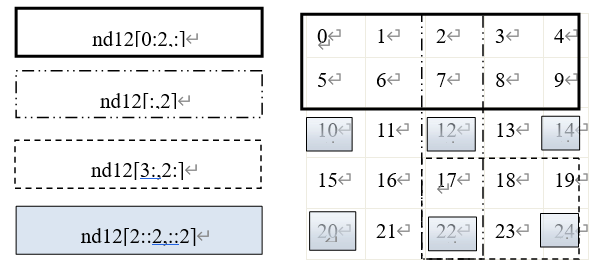
<center>图1-4 获取多维数组中的元素</center>

要获取数组中的部分元素，除了可以通过指定索引标签外，还可以使用一些函数来实现，如通过random.choice函数可以从指定的样本中进行随机抽取数据。

In [11]:
import numpy as np
from numpy import random as nr

a=np.arange(1,25,dtype=float)
c1=nr.choice(a,size=(3,4))  #size指定输出数组形状
c2=nr.choice(a,size=(3,4),replace=False)  #replace默认为True，即可重复抽取。
#下式中参数p指定每个元素对应的抽取概率，默认为每个元素被抽取的概率相同。
c3=nr.choice(a,size=(3,4),p=a / np.sum(a))
print("随机可重复抽取")
print(c1)
print("随机但不重复抽取")
print(c2)
print("随机但按制度概率抽取")
print(c3)


随机可重复抽取
[[19.  6. 24. 22.]
 [21. 17. 16.  2.]
 [23. 15. 13. 11.]]
随机但不重复抽取
[[ 5. 14. 23. 15.]
 [ 8. 24.  6. 18.]
 [13. 10. 21. 11.]]
随机但按制度概率抽取
[[19. 21. 18. 11.]
 [10. 21. 23. 19.]
 [18. 19. 11. 20.]]


### 1.3 NumPy的算术运算	
机器学习和深度学习中涉及大量的数组或矩阵运算，这节我们将重点介绍两种常用的运算。一种是对应元素相乘，又称为逐元乘法(element-wise product)，运算符为np.multiply(), 或 *。另一种是点积或内积运算（dot product），运算符为np.dot()。

#### 1.3.1对应元素相乘
对应元素相乘是计算两个矩阵中对应元素的乘积。np.multiply 函数用于数组或矩阵对应元素相乘，输出与相乘数组或矩阵的大小一致，其格式如下:


**<font color=blue>numpy.multiply(x1, x2, /, out=None, *, where=True,casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])</font>**  
其中x1、x2之间的对应元素相乘遵守广播规则，NumPy的广播规则将在1.6节介绍。下面我们通过一些示例来进一步说明。

In [14]:
A = np.array([[1, 2], [-1, 4]])
B = np.array([[2, 0], [3, 4]])
A*B
#或另一种表示方法
np.multiply(A,B)


array([[ 2,  0],
       [-3, 16]])

矩阵A和B的对应元素相乘，可以直观地用图1-5表示。  
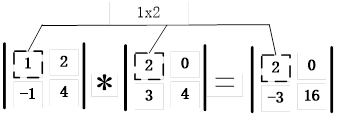
<center>图1-5 对应元素相乘示意图 </center> 
NumPy数组不仅可以与数组进行对应元素相乘，也可以与单一数值（或称为标量）进行运算。运算时，NumPy数组的每个元素与标量进行运算，其间会用到广播机制。例如：

In [15]:
print(A*2.0)
print(A/2.0)


[[ 2.  4.]
 [-2.  8.]]
[[ 0.5  1. ]
 [-0.5  2. ]]


由此可见，数组通过一些激活函数的运算后，输出与输入形状一致。

In [16]:
X=np.random.rand(2,3)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return np.maximum(0,x)
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

print("输入参数X的形状：",X.shape)
print("激活函数sigmoid输出形状：", sigmoid(X).shape)
print("激活函数relu输出形状：",relu(X).shape)
print("激活函数softmax输出形状：",softmax(X).shape)


输入参数X的形状： (2, 3)
激活函数sigmoid输出形状： (2, 3)
激活函数relu输出形状： (2, 3)
激活函数softmax输出形状： (2, 3)


#### 1.3.2 点积运算
	点积运算又称为内积，在NumPy用np.dot表示，其一般格式为：
**<font size=4  color=blue>numpy.dot(a, b, out=None)</font>**  
以下通过一个示例来说明点积运算的具体使用方法及注意事项。


In [1]:
X1=np.array([[1,2],[3,4]])
X2=np.array([[5,6,7],[8,9,10]])
X3=np.dot(X1,X2)
print(X3)


NameError: name 'np' is not defined

以上运算可以直观地用图1-6表示。
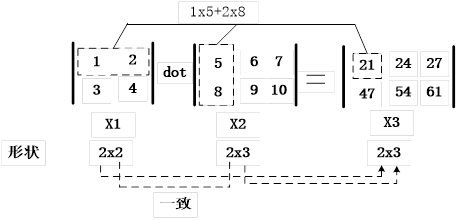
 
 <center>图1-6  矩阵的点积示意图，对应维度的元素个数需要保持一致</center>
	如图1-6所示，矩阵X1和矩阵X2进行点积运算，其中X1和X2对应维度（即X1的第2个维度与X2的第1个维度）的元素个数必须保持一致。此外，矩阵X3的形状是由矩阵X1的行数与矩阵X2的列数确定。
	点积运算在神经网络中的使用非常频繁，如图1-7所示的神经网络，其输入I与权重矩阵W之间的运算就是点积运算。


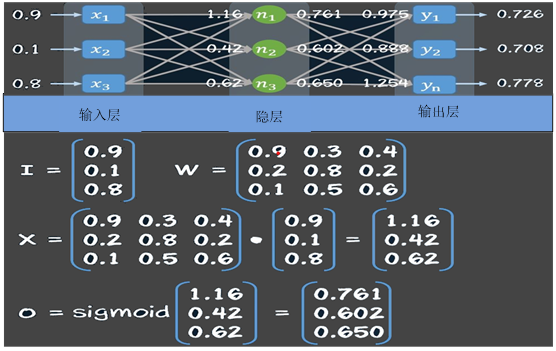
<center>图1-7 点积运算可视化示意图</center>